In [2]:
!pip install seaborn scikit-learn



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # for better visualization
import torch  # for any tensor operations
from sklearn.preprocessing import MinMaxScaler  # for normalization, if needed


SystemError: �() method: bad call flags

In [4]:
!pip uninstall torch torchvision torchaudio
!pip install torch torchvision torchaudio

Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Would remove:
    /usr/local/bin/convert-caffe2-to-onnx
    /usr/local/bin/convert-onnx-to-caffe2
    /usr/local/bin/torchfrtrace
    /usr/local/bin/torchrun
    /usr/local/lib/python3.10/dist-packages/functorch/*
    /usr/local/lib/python3.10/dist-packages/torch-2.5.1+cu121.dist-info/*
    /usr/local/lib/python3.10/dist-packages/torch/*
    /usr/local/lib/python3.10/dist-packages/torchgen/*
Proceed (Y/n)? Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/uninstall.py", line 106, in run
    uninstall_pathset = req.uninstall(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 722, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/pyt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # for better visualization
import torch  # for any tensor operations
from sklearn.preprocessing import MinMaxScaler  # for normalization, if needed


In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn torch --quiet


In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import torch

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


In [11]:
df = pd.read_csv('data.csv')


In [12]:
print("Top 5 rows:")
print(df.head())
print("\nLast 5 rows:")
print(df.tail())

Top 5 rows:
  Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compa

In [13]:
print("Data types of each column:")
print(df.dtypes)


Data types of each column:
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


data type done, column dropping now

In [14]:
drop_columns = [
    'Engine Fuel Type', 'Market Category', 'Vehicle Style',
    'Popularity', 'Number of Doors', 'Vehicle Size'
]
df = df.drop(columns=drop_columns)
print("Columns after dropping irrelevant ones:")
print(df.head())


Columns after dropping irrelevant ones:
  Make       Model  Year  Engine HP  Engine Cylinders Transmission Type  \
0  BMW  1 Series M  2011      335.0               6.0            MANUAL   
1  BMW    1 Series  2011      300.0               6.0            MANUAL   
2  BMW    1 Series  2011      300.0               6.0            MANUAL   
3  BMW    1 Series  2011      230.0               6.0            MANUAL   
4  BMW    1 Series  2011      230.0               6.0            MANUAL   

      Driven_Wheels  highway MPG  city mpg   MSRP  
0  rear wheel drive           26        19  46135  
1  rear wheel drive           28        19  40650  
2  rear wheel drive           28        20  36350  
3  rear wheel drive           28        18  29450  
4  rear wheel drive           28        18  34500  


In [15]:
df.rename(columns={
    'Engine HP': 'HP',
    'Engine Cylinders': 'Cylinders',
    'Transmission Type': 'Transmission',
    'Driven_Wheels': 'Drive Mode',
    'highway MPG': 'MPG-H',
    'city mpg': 'MPG-C',
    'MSRP': 'Price'
}, inplace=True)
print("Columns after renaming:")
print(df.head())


Columns after renaming:
  Make       Model  Year     HP  Cylinders Transmission        Drive Mode  \
0  BMW  1 Series M  2011  335.0        6.0       MANUAL  rear wheel drive   
1  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
2  BMW    1 Series  2011  300.0        6.0       MANUAL  rear wheel drive   
3  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   
4  BMW    1 Series  2011  230.0        6.0       MANUAL  rear wheel drive   

   MPG-H  MPG-C  Price  
0     26     19  46135  
1     28     19  40650  
2     28     20  36350  
3     28     18  29450  
4     28     18  34500  


In [16]:
print(f"Original shape: {df.shape}")
print(f"Number of duplicates: {df.duplicated().sum()}")

df = df.drop_duplicates()

print(f"New shape after dropping duplicates: {df.shape}")


Original shape: (11914, 10)
Number of duplicates: 989
New shape after dropping duplicates: (10925, 10)


tensors, tuples

In [17]:
numerical_cols = df.select_dtypes(include=[np.number])

data_tensor = torch.tensor(numerical_cols.values, dtype=torch.float32)

print("Sum of each column:", torch.sum(data_tensor, dim=0))
print("Mean of each column:", torch.mean(data_tensor, dim=0))
print("Standard deviation:", torch.std(data_tensor, dim=0))
print("Minimum values:", torch.min(data_tensor, dim=0)[0])
print("Median values:", torch.median(data_tensor, dim=0)[0])
print("Maximum values:", torch.max(data_tensor, dim=0)[0])


Sum of each column: tensor([2.1969e+07,        nan,        nan, 2.9120e+05, 2.1600e+05, 4.6428e+08])
Mean of each column: tensor([2.0109e+03,        nan,        nan, 2.6655e+01, 1.9771e+01, 4.2497e+04])
Standard deviation: tensor([7.0161e+00,        nan,        nan, 9.0311e+00, 9.2595e+00, 6.2054e+04])
Minimum values: tensor([1990.,   nan,   nan,   12.,    7., 2000.])
Median values: tensor([2.0150e+03,        nan,        nan, 2.5000e+01, 1.8000e+01, 3.0920e+04])
Maximum values: tensor([2.0170e+03,        nan,        nan, 3.5400e+02, 1.3700e+02, 2.0659e+06])


In [20]:

print("no. of missing values per column:")
print(df.isnull().sum())

df = df.dropna()

print("no. of missing values after cleaning:")
print(df.isnull().sum())


no. of missing values per column:
Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64
no. of missing values after cleaning:
Make            0
Model           0
Year            0
HP              0
Cylinders       0
Transmission    0
Drive Mode      0
MPG-H           0
MPG-C           0
Price           0
dtype: int64


alpha =0.5 so that the points overlapping behind it can be seen

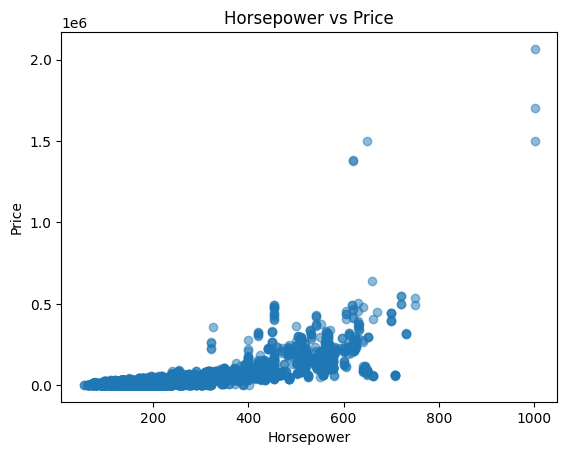

In [21]:
plt.scatter(df['HP'], df['Price'], alpha=0.5)
plt.title("Horsepower vs Price")
plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.show()


#groupby karke ek saal ka ek alag daatset maan sakte hai usme fir counting (2D ARRAY jaisa samjhne ko) {this is for me to undertand what i am doing}

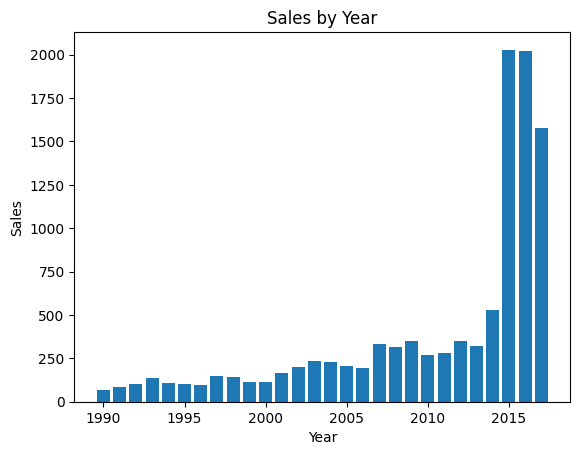

In [22]:
sales_by_year = df.groupby('Year').size()
plt.bar(sales_by_year.index, sales_by_year.values)
plt.title("Sales by Year")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()

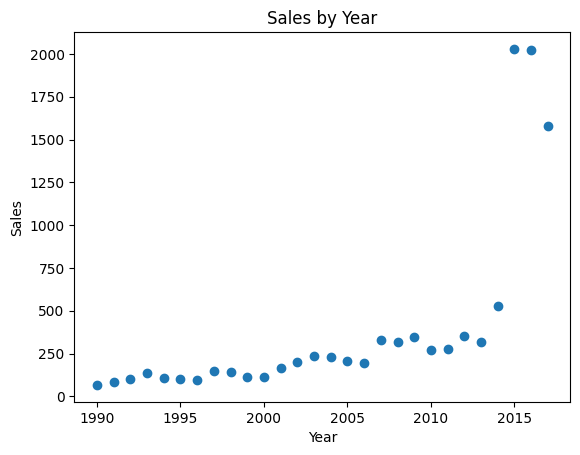

In [23]:
plt.scatter(sales_by_year.index, sales_by_year.values)
plt.title("Sales by Year")
plt.xlabel("Year")
plt.ylabel("Sales")
plt.show()


{for me to understand} total sales ka cumulative addition karte jaana hai so pehle sales for each year nikala, fir uska ek alag df banaya maan lo, for uska cumulative addition kiya hai bas usko 2 naam diye hai df ko store karne

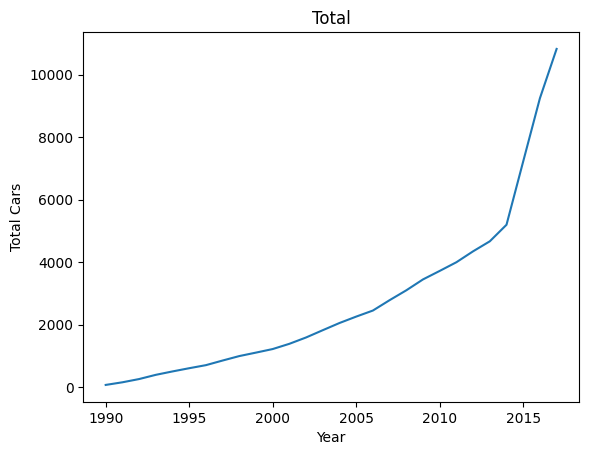

In [36]:
sales = df.groupby('Year').size().reset_index(name='Sales')
sales['Total'] = sales['Sales'].cumsum()
plt.plot(sales_by_year.index, sales['Total'])
plt.title("Total")
plt.xlabel("Year")
plt.ylabel("Total Cars")
plt.show()

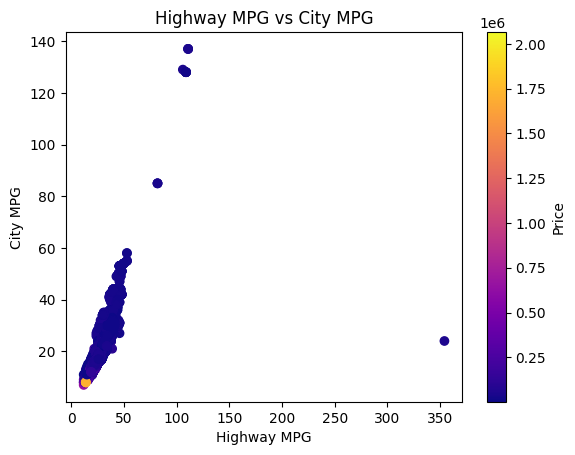

In [26]:
plt.scatter(df['MPG-H'], df['MPG-C'], c=df['Price'], cmap='plasma')
plt.title("Highway MPG vs City MPG")
plt.xlabel("Highway MPG")
plt.ylabel("City MPG")
plt.colorbar(label='Price')
plt.show()

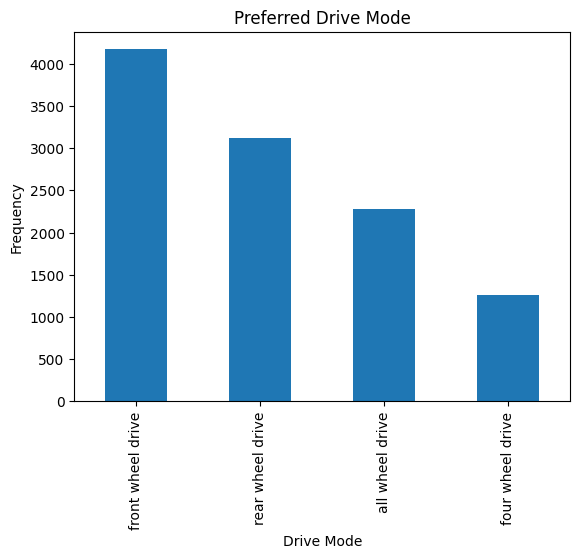

In [31]:
df['Drive Mode'].value_counts().plot(kind='bar')
plt.title("Preferred Drive Mode")
plt.xlabel("Drive Mode")
plt.ylabel("Frequency")
plt.show()


calculates pearson correlation coefficients

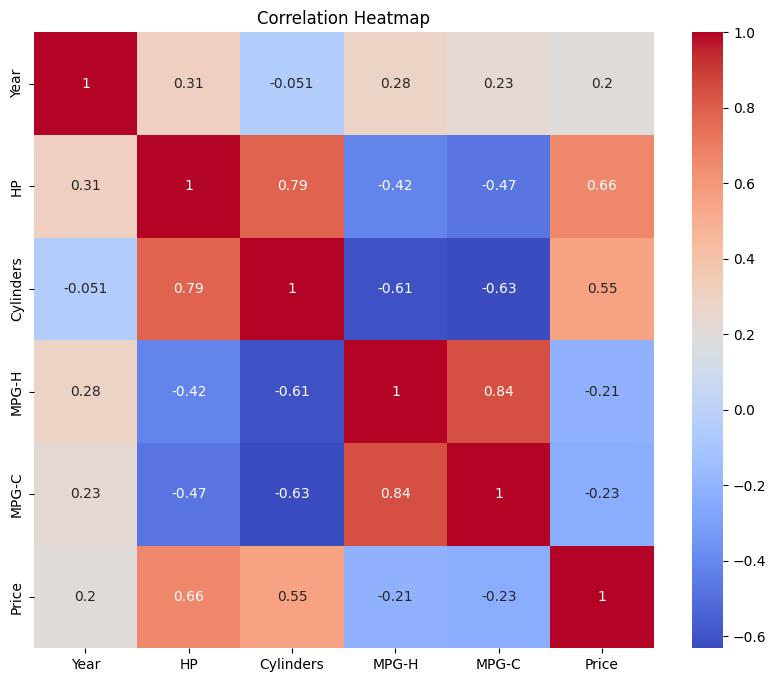

In [32]:
numeric_cols = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


for 11 i did use chatgpt

In [37]:
# Normalize using MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(numeric_cols)

# Convert to PyTorch tensor
normalized_tensor = torch.tensor(normalized_data, dtype=torch.float32)

print("Normalized Data (first 5 rows):")
print(normalized_tensor[:5])


Normalized Data (first 5 rows):
tensor([[0.7778, 0.2960, 0.3750, 0.0409, 0.0923, 0.0214],
        [0.7778, 0.2590, 0.3750, 0.0468, 0.0923, 0.0187],
        [0.7778, 0.2590, 0.3750, 0.0468, 0.1000, 0.0166],
        [0.7778, 0.1850, 0.3750, 0.0468, 0.0846, 0.0133],
        [0.7778, 0.1850, 0.3750, 0.0468, 0.0846, 0.0157]])


basically normalised the first 5 rows